How to run:

1) place all folders into the same root folder
2) open a command line
3) navigate to the folder
4) run python3 -m venv venv
5) run pip install -r requirements.txt
6) select venv/bin/python3 as the interpreter for your IDE

Downloading the features takes around two mins - please be patient

NOTE: This project it not finished. Due to time contains and because my partner dropped out of the course, i had to compromise the reporting. The Algorithms run smoothly and take around 1h and 10 min. Please feel free to reduce the number of clusters!

What is implemented: All 3 Clustering methods

What is missing: some reporting points

In [1]:
from ucimlrepo import fetch_ucirepo
from log_config import get_logger
from k_means import KMeans

logger = get_logger(__name__)
logger.info("Restarting from imports")

2025-06-16 17:09:51,322 - INFO - __main__ - <module> - Restarting from imports


In [2]:
logger.info("Fetching UCI repository...")
# fetch dataset
try:
    covertype = fetch_ucirepo(id=31)

    # data (as pandas dataframes)
    X = covertype.data.features
    y = covertype.data.targets
except ConnectionError as e:
    logger.error(e)


logger.info("Done fetching UCI repository.")

2025-06-16 17:09:51,329 - INFO - __main__ - <module> - Fetching UCI repository...
2025-06-16 17:11:59,103 - INFO - __main__ - <module> - Done fetching UCI repository.


REPORT:

Include a plot illustrating convergence of k-means.

See plots below.


Track the number of iterations needed for convergence and compare it to the other
implementations.

See Statistics after the plot.


Report the achieved NMI averaged over at least 5 runs.

See Statistics after the plot.


Report the runtime in [sec] for your algorithm averaged over at least 5 runs. Also
report the number of distance computations performed.

See Statistics after the plot.


Briefly discuss your implementation of Lloyds algorithm.

Explanation on Lloyds algorithm:

1) Per iterations first we calculate the distances from every point to every centroid.
2) then we assign each point to its nearest center
3) then we check for convergence by checking if the new assignment is the same as the assignment from the last iteration - if so, the algorithm stops
4) if the algorithm did not stop we iterate through all centers and grabbing all assigned points to this center - then we recalculate the center position by calculation the mean of all points that are assigned to this center

2025-06-16 17:11:59,249 - INFO - __main__ - <module> - ---------------------- STARTING RUN AVG --------------------
2025-06-16 17:11:59,282 - INFO - KMeans - fit_classic - Fitting KMeans model with 10 clusters on 581012 samples with dimensions (581012, 54)
2025-06-16 17:12:49,242 - INFO - KMeans - fit_classic - Converged after 53 iterations
2025-06-16 17:12:49,289 - INFO - KMeans - fit_classic - KMeans Lloyd DONE - took 49.96032841100009 seconds with 53 iterations - NMI: 0.07515176921853249 - num distances: 307936360
2025-06-16 17:12:49,290 - INFO - __main__ - <module> - ---------------------- NEW RUN AVG --------------------
2025-06-16 17:12:49,317 - INFO - KMeans - fit_classic - Fitting KMeans model with 10 clusters on 581012 samples with dimensions (581012, 54)
2025-06-16 17:12:59,691 - INFO - KMeans - fit_classic - Converged after 11 iterations
2025-06-16 17:12:59,728 - INFO - KMeans - fit_classic - KMeans Lloyd DONE - took 10.37430079700016 seconds with 11 iterations - NMI: 0.0751

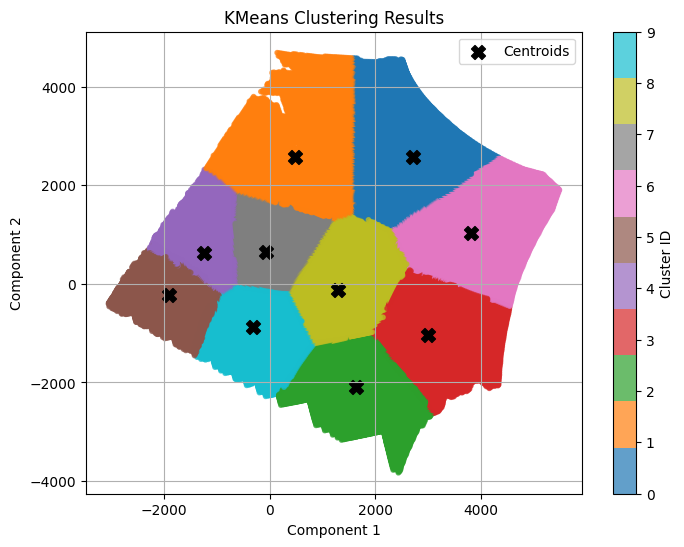

2025-06-16 17:13:11,912 - INFO - __main__ - <module> - Classical K-Means STATS: AVG NMI=0.07512781238489721 - AVG TIME=13.165708027200026 - NUM DISTANCE CALCULATIONS = 11620240


In [3]:
nmi_sum = 0
time = 0
logger.info("---------------------- STARTING RUN AVG --------------------")
for i in range(5):
    k_means = KMeans(X, y, 10)
    k_means.fit_classic()
    nmi_sum += k_means.score
    time += (k_means.end_time - k_means.start_time)
    logger.info("---------------------- NEW RUN AVG --------------------")

logger.info(f"--------------------------- FINAL RUN FOR STATISTICS ---------------------------")
k_means = KMeans(X, y, 10)
k_means.fit_classic()
k_means.plot()
logger.info(f"Classical K-Means STATS: AVG NMI={nmi_sum / 5} - AVG TIME={time / 5} - NUM DISTANCE CALCULATIONS = {k_means.distance_calculations}")

REPORT:

Report how you selected the parameters of LSH and how you combined your functions.



Report the accuracy using NMI and the runtime in seconds averaged over at least 5
runs. Also report the number of distance computations performed. If your implementation doesn’t show a speed-up, discuss why this might be and also discuss whether this situation would change when working larger datasets.

K-Means with LSH does not run faster then the classic k-means for a small k. But the runtime is smaller for larger k. For Example both the classic and k-means with LSH run for 10 clusters at around 8 minutes (on my machine) but for 25 clusters classical Lloyd runs 30 min and k-means with clusters barely increases in the runtime (from 8 minutes to 9 minutes)

Track the number of iterations needed for convergence (if it converges at all) and
compare it to the other implementations.

K-means with LSH does need only few iterations. For 10 clusters my implementation needs only 2 iterations while the classical need 237.

Briefly discuss your implementation of k-means with LSH.

Explanation K-Means with LSH:

For the implementation of the LSH container i just reused the one I programmed in PA1. For the projection i use the same projection as in PA1.

1) initialise all points by putting them into the LSH container and see where they land
2) iteration through all random pre-assigned centroids
3) querying lsh for the bucket the centroid would have landed in the lsh container
4) then we iterate through all the points in the bucket
5) then calculating the distances from the centriod to all the points in the bucket
6) after that it the same steps as in the classical algorithm


2025-06-16 17:13:11,980 - INFO - __main__ - <module> - ---------------------- STARTING RUN AVG --------------------
2025-06-16 17:13:12,010 - INFO - KMeans - fit_with_lsh - Starting KMeans with LSH with 16 tables and 4 hash size for n=581012 samples
2025-06-16 17:14:48,961 - INFO - KMeans - fit_with_lsh - LSH-KMeans converged in 2 iterations.
2025-06-16 17:14:49,065 - INFO - KMeans - fit_with_lsh - KMeans with LSH DONE - took: 97.0182353629998 seconds - 2 iterations - NMI: 0.06994988125456215 - num distance calculations: 11273020
2025-06-16 17:14:49,200 - INFO - __main__ - <module> - ---------------------- NEW RUN AVG --------------------
2025-06-16 17:14:49,229 - INFO - KMeans - fit_with_lsh - Starting KMeans with LSH with 16 tables and 4 hash size for n=581012 samples
2025-06-16 17:16:26,708 - INFO - KMeans - fit_with_lsh - LSH-KMeans converged in 2 iterations.
2025-06-16 17:16:26,817 - INFO - KMeans - fit_with_lsh - KMeans with LSH DONE - took: 97.54509415300026 seconds - 2 iteratio

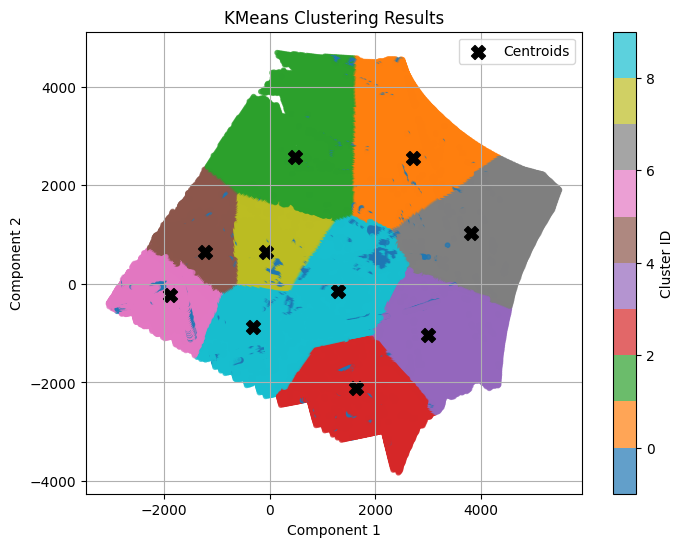

2025-06-16 17:23:03,155 - INFO - __main__ - <module> - LSH K-Means STATS: AVG NMI=0.0751218231764884 - AVG TIME=1.834908834000089 - NUM DISTANCE CALCULATIONS = 11620240


In [4]:
nmi_sum = 0
time = 0
logger.info("---------------------- STARTING RUN AVG --------------------")
for i in range(5):
    k_means_lsh = KMeans(X, y, 10)
    k_means_lsh.fit_with_lsh(16, 4)
    nmi_sum += k_means.score
    time += (k_means.end_time - k_means.start_time)
    logger.info("---------------------- NEW RUN AVG --------------------")

logger.info(f"--------------------------- FINAL RUN FOR STATISTICS ---------------------------")
k_means_lsh = KMeans(X, y, 10)
k_means_lsh.fit_with_lsh(16, 4)
k_means_lsh.plot()

logger.info(f"LSH K-Means STATS: AVG NMI={nmi_sum / 5} - AVG TIME={time / 5} - NUM DISTANCE CALCULATIONS = {k_means.distance_calculations}")

REPORT CORE SETS:

Report the runtime and NMI you achieve when using coresets of different size (as
described above) averaged over at least 5 runs. To do so, cluster the coresets using
sklearn’s k-means algorithm (you can supply sample weights to all needed functions).

See the Statistics below.

Track the number of iterations needed for convergence and compare it to the other
implementations.

See in the iterations took, NMI and the averages in the logs below.
TODO!!!


Analyze the variance of the accuracy obtained when using coresets for clustering by
computing 10 coresets for each choice of m.
TODO!!!

2025-06-16 17:23:03,213 - INFO - __main__ - <module> - ---------------------- STARTING RUN AVG --------------------
2025-06-16 17:23:03,244 - INFO - KMeans - fit_with_core_sets - Starting KMeans with core sets of m=100, k=10, alpha=2, datashape shape=(581012, 54)
2025-06-16 17:23:05,078 - INFO - KMeans - fit_with_core_sets - Coreset-based KMeans fit with m=100 coreset samples DONE - Time took 1.7989679410002282 - 5 iterations - NMI = 0.07087679130143998
2025-06-16 17:23:05,086 - INFO - __main__ - <module> - ---------------------- NEW RUN AVG --------------------
2025-06-16 17:23:05,113 - INFO - KMeans - fit_with_core_sets - Starting KMeans with core sets of m=100, k=10, alpha=2, datashape shape=(581012, 54)
2025-06-16 17:23:06,943 - INFO - KMeans - fit_with_core_sets - Coreset-based KMeans fit with m=100 coreset samples DONE - Time took 1.7951223969998864 - 10 iterations - NMI = 0.07624862685834048
2025-06-16 17:23:06,951 - INFO - __main__ - <module> - ---------------------- NEW RUN AV

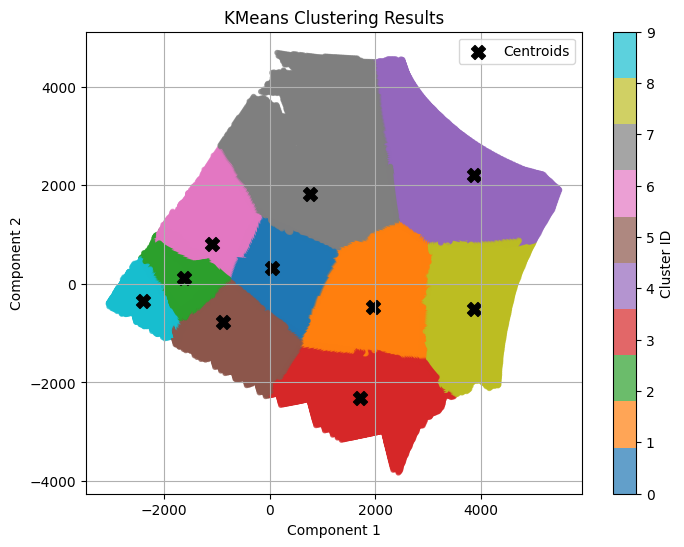

2025-06-16 17:23:18,924 - INFO - __main__ - <module> - Core Sets K-Means STATS: AVG NMI=0.07406084965102064 - AVG TIME=1.7885165514000618 - WITH M=100
2025-06-16 17:23:18,924 - INFO - __main__ - <module> - ---------------------- STARTING RUN AVG --------------------
2025-06-16 17:23:18,953 - INFO - KMeans - fit_with_core_sets - Starting KMeans with core sets of m=1000, k=10, alpha=2, datashape shape=(581012, 54)
2025-06-16 17:23:20,779 - INFO - KMeans - fit_with_core_sets - Coreset-based KMeans fit with m=1000 coreset samples DONE - Time took 1.788271827999779 - 13 iterations - NMI = 0.07771007697125869
2025-06-16 17:23:20,787 - INFO - __main__ - <module> - ---------------------- NEW RUN AVG --------------------
2025-06-16 17:23:20,815 - INFO - KMeans - fit_with_core_sets - Starting KMeans with core sets of m=1000, k=10, alpha=2, datashape shape=(581012, 54)
2025-06-16 17:23:22,636 - INFO - KMeans - fit_with_core_sets - Coreset-based KMeans fit with m=1000 coreset samples DONE - Time t

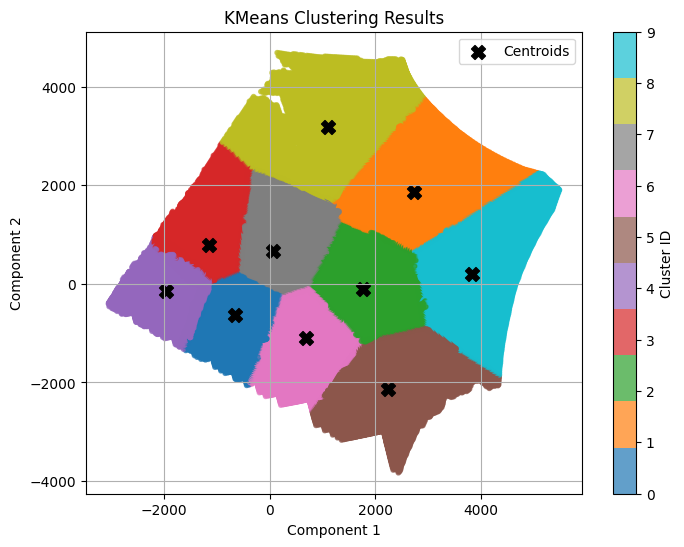

2025-06-16 17:23:34,607 - INFO - __main__ - <module> - Core Sets K-Means STATS: AVG NMI=0.07727146005577483 - AVG TIME=1.7843868437998935 - WITH M=1000
2025-06-16 17:23:34,607 - INFO - __main__ - <module> - ---------------------- STARTING RUN AVG --------------------
2025-06-16 17:23:34,635 - INFO - KMeans - fit_with_core_sets - Starting KMeans with core sets of m=10000, k=10, alpha=2, datashape shape=(581012, 54)
2025-06-16 17:23:36,574 - INFO - KMeans - fit_with_core_sets - Coreset-based KMeans fit with m=10000 coreset samples DONE - Time took 1.8983695050001188 - 73 iterations - NMI = 0.07816045668799129
2025-06-16 17:23:36,582 - INFO - __main__ - <module> - ---------------------- NEW RUN AVG --------------------
2025-06-16 17:23:36,609 - INFO - KMeans - fit_with_core_sets - Starting KMeans with core sets of m=10000, k=10, alpha=2, datashape shape=(581012, 54)
2025-06-16 17:23:38,569 - INFO - KMeans - fit_with_core_sets - Coreset-based KMeans fit with m=10000 coreset samples DONE - 

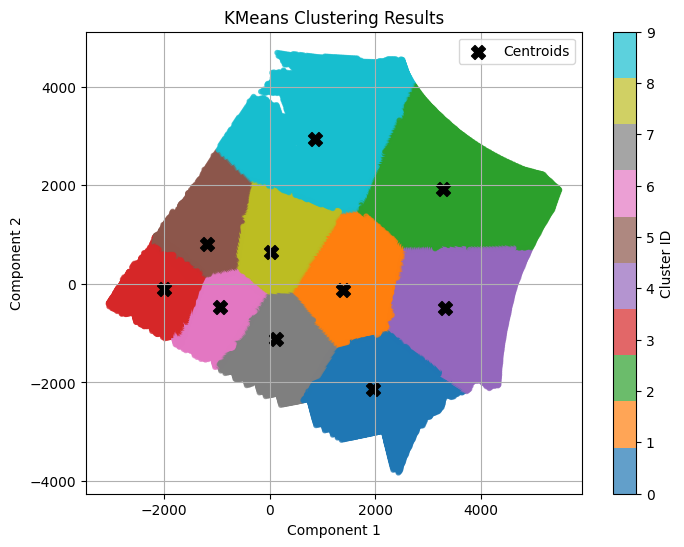

2025-06-16 17:23:51,120 - INFO - __main__ - <module> - Core Sets K-Means STATS: AVG NMI=0.07765066254547134 - AVG TIME=1.9168135832000188 - WITH M=10000


In [5]:
nmi_sum = 0
time = 0
logger.info("---------------------- STARTING RUN AVG --------------------")
for i in range(5):
    k_means = KMeans(X, y, k=10)
    k_means.fit_with_core_sets(m=100, alpha=2)
    nmi_sum += k_means.score
    time += (k_means.end_time - k_means.start_time)
    logger.info("---------------------- NEW RUN AVG --------------------")

k_means = KMeans(X, y, 10)
k_means.fit_with_core_sets(m=100, alpha=2)
k_means.plot()

logger.info(f"Core Sets K-Means STATS: AVG NMI={nmi_sum / 5} - AVG TIME={time / 5} - WITH M={100}")

nmi_sum = 0
time = 0
logger.info("---------------------- STARTING RUN AVG --------------------")
for i in range(5):
    k_means = KMeans(X, y, k=10)
    k_means.fit_with_core_sets(m=1000, alpha=2)
    nmi_sum += k_means.score
    time += (k_means.end_time - k_means.start_time)
    logger.info("---------------------- NEW RUN AVG --------------------")

k_means = KMeans(X, y, 10)
k_means.fit_with_core_sets(m=1000, alpha=2)
k_means.plot()

logger.info(f"Core Sets K-Means STATS: AVG NMI={nmi_sum / 5} - AVG TIME={time / 5} - WITH M={1000}")

nmi_sum = 0
time = 0
logger.info("---------------------- STARTING RUN AVG --------------------")
for i in range(5):
    k_means = KMeans(X, y, k=10)
    k_means.fit_with_core_sets(m=10000, alpha=2)
    nmi_sum += k_means.score
    time += (k_means.end_time - k_means.start_time)
    logger.info("---------------------- NEW RUN AVG --------------------")

logger.info(f"--------------------------- FINAL RUN FOR STATISTICS ---------------------------")
k_means = KMeans(X, y, 10)
k_means.fit_with_core_sets(m=10000, alpha=2)
k_means.plot()
logger.info(f"Core Sets K-Means STATS: AVG NMI={nmi_sum / 5} - AVG TIME={time / 5} - WITH M={10000}")